### Passo 1: forncer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Empresa	Código
BTG Pactual	BPAC11
B3  	  B3SA3
Taesa	  TAEE11
Eneva	  ENEV3
Vale	  VALE3
Cosan	  CSAN3
Weg       WEGE3
TOTVS	  TOTS3
Multiplan MULT3
Renner	  LREN3


In [2]:
tickers = ['LREN3.SA', 'MULT3.SA','TOTS3.SA', 'WEGE3.SA', 'CSAN3.SA', 
           'VALE3.SA', 'ENEV3.SA', 'TAEE11.SA', 'B3SA3.SA','BPAC11.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [4]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,B3SA3.SA,BPAC11.SA,CSAN3.SA,ENEV3.SA,LREN3.SA,MULT3.SA,TAEE11.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2021-08-31,14.07,28.430000,22.049999,15.670000,38.060001,21.100000,37.910000,39.599998,98.680000,35.560001
2021-09-01,14.43,27.969999,22.570000,16.299999,37.500000,20.870001,38.110001,40.599998,98.849998,36.290001
2021-09-02,14.07,27.629999,22.290001,15.950000,36.529999,20.370001,37.740002,39.299999,98.540001,35.740002
2021-09-03,14.05,27.480000,22.129999,15.870000,37.119999,20.170000,37.980000,39.169998,98.610001,36.250000
2021-09-06,14.32,27.940001,22.350000,15.990000,37.119999,20.540001,37.779999,39.000000,97.059998,36.380001


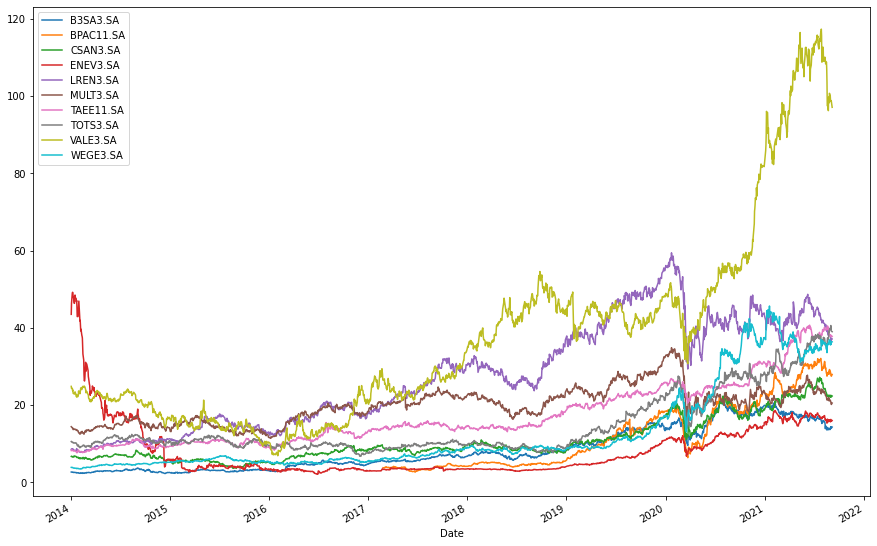

In [5]:
preços[preços.index >= "2014-01-01"].plot(figsize=(15,10));

### Passo 2: Estimando os retornos esperados

In [6]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [7]:
# Retorno Esperado - usando a média histórica
from pypfopt.expected_returns import mean_historical_return
re1= mean_historical_return(preços)
re1

B3SA3.SA    -0.033280
BPAC11.SA    0.564980
CSAN3.SA     0.138936
ENEV3.SA    -0.163781
LREN3.SA    -0.211469
MULT3.SA     0.088290
TAEE11.SA    0.192222
TOTS3.SA     0.226795
VALE3.SA     0.196204
WEGE3.SA     0.301256
dtype: float64

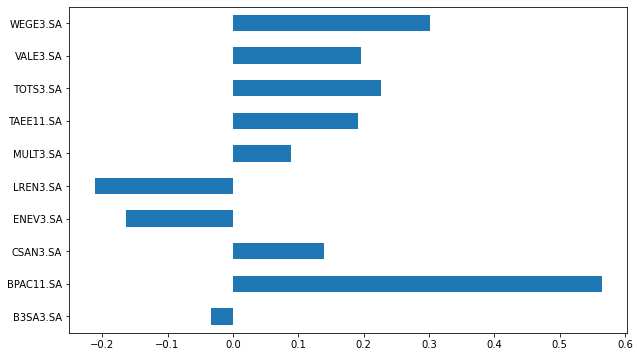

In [8]:
re1.plot.barh(figsize=(10,6));

In [9]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

re2 = expected_returns.capm_return(preços)
re2

B3SA3.SA     0.258359
BPAC11.SA    0.288309
CSAN3.SA     0.224852
ENEV3.SA     0.212947
LREN3.SA     0.299688
MULT3.SA     0.198344
TAEE11.SA    0.105869
TOTS3.SA     0.156162
VALE3.SA     0.186467
WEGE3.SA     0.142216
Name: mkt, dtype: float64

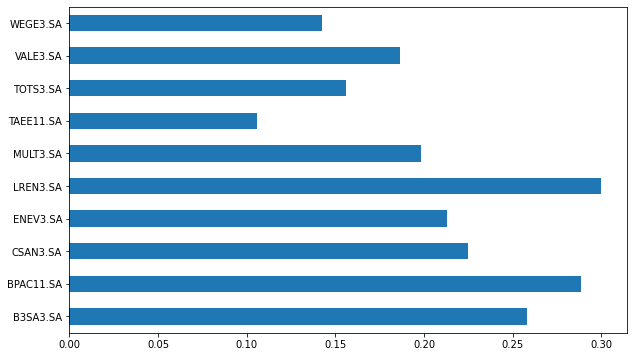

In [10]:
re2.plot.barh(figsize=(10,6));

### Estimando a matriz de covariância

In [11]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

m_cov = risk_models.sample_cov(preços, frequency=252)
m_cov

,B3SA3.SA,BPAC11.SA,CSAN3.SA,ENEV3.SA,LREN3.SA,MULT3.SA,TAEE11.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
B3SA3.SA,0.233770,0.108045,0.082556,0.052445,0.088298,0.078140,0.035963,0.048887,0.086252,0.057632
BPAC11.SA,0.108045,0.246789,0.088274,0.064916,0.096330,0.103011,0.040206,0.082356,0.069435,0.067352
CSAN3.SA,0.082556,0.088274,0.187179,0.044416,0.077014,0.067987,0.024924,0.035872,0.070364,0.045109
ENEV3.SA,0.052445,0.064916,0.044416,0.307902,0.040985,0.035122,0.018811,0.037287,0.051786,0.035398
LREN3.SA,0.088298,0.096330,0.077014,0.040985,0.271657,0.080358,0.030608,0.044987,0.046342,0.032673
MULT3.SA,0.078140,0.103011,0.067987,0.035122,0.080358,0.144646,0.024398,0.042629,0.053570,0.042237
TAEE11.SA,0.035963,0.040206,0.024924,0.018811,0.030608,0.024398,0.082229,0.016849,0.022994,0.018821
TOTS3.SA,0.048887,0.082356,0.035872,0.037287,0.044987,0.042629,0.016849,0.134452,0.038243,0.033432
VALE3.SA,0.086252,0.069435,0.070364,0.051786,0.046342,0.053570,0.022994,0.038243,0.168171,0.031060
WEGE3.SA,0.057632,0.067352,0.045109,0.035398,0.032673,0.042237,0.018821,0.033432,0.031060,0.114372


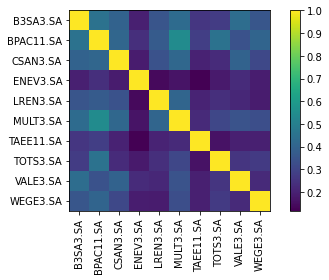

In [12]:
plotting.plot_covariance(m_cov, plot_correlation=True);

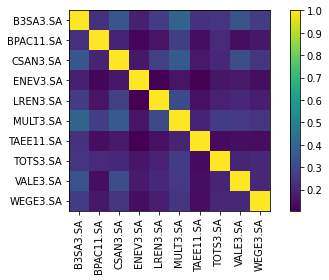

In [13]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Est_red, plot_correlation=True);

### Passo 3: A carteira que maximiza o Índice de Sharpe

In [14]:
# PESOS de cada Ativo
from pypfopt import EfficientFrontier

ef = EfficientFrontier (re2,Est_red)
pesos = ef.max_sharpe()
pesos

OrderedDict([('B3SA3.SA', 0.0717769854035381),
             ('BPAC11.SA', 0.6082031013075891),
             ('CSAN3.SA', 0.0614084175096332),
             ('ENEV3.SA', 0.0730421554275935),
             ('LREN3.SA', 0.0713201872370994),
             ('MULT3.SA', 0.0220168163786472),
             ('TAEE11.SA', 0.0506701106843248),
             ('TOTS3.SA', 0.0197838526371802),
             ('VALE3.SA', 0.0184603085221897),
             ('WEGE3.SA', 0.0033180648922046)])

In [15]:
cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('B3SA3.SA', 0.07178),
             ('BPAC11.SA', 0.6082),
             ('CSAN3.SA', 0.06141),
             ('ENEV3.SA', 0.07304),
             ('LREN3.SA', 0.07132),
             ('MULT3.SA', 0.02202),
             ('TAEE11.SA', 0.05067),
             ('TOTS3.SA', 0.01978),
             ('VALE3.SA', 0.01846),
             ('WEGE3.SA', 0.00332)])

### O desempenho esperado desse portfólio é:

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 26.1%
Annual volatility: 19.1%
Sharpe Ratio: 1.26


(0.2613654258363855, 0.1910480275025788, 1.2633756495241886)

### Usando outro modelo de retorno...

In [17]:
# O Algorítmo da Linha Critica (ALC) - gera portfólios ótimos usando o Algoritmo de Linha Crítica implementado.

from pypfopt import CLA, plotting

alc = CLA(re2, Est_red )
alc.max_sharpe()
alc.portfolio_performance(verbose=True);

Expected annual return: 25.3%
Annual volatility: 18.5%
Sharpe Ratio: 1.26


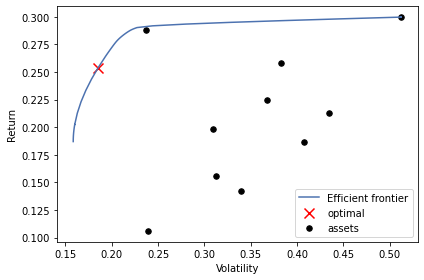

In [18]:
ax = plotting.plot_efficient_frontier(alc, showfig=False)